In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set_theme()

# USB sticks

We model the relationship between capacity and resulting price using linear regression.

In [2]:
usb = pd.DataFrame({
    "capacity": [16, 32, 64, 128, 256], 
    "price": [6, 6.5, 8.5, 14, 28]
})
usb

,capacity,price
0,16,6.0
1,32,6.5
2,64,8.5
3,128,14.0
4,256,28.0


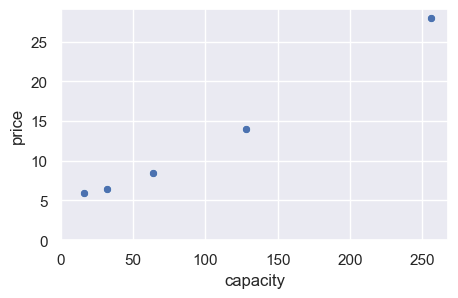

In [3]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.scatterplot(ax=ax, x=usb["capacity"], y = usb["price"])
ax.set(xlim=(0, None), ylim = (0, None)) # include origin
plt.show()

The relationship is clearly linear, so that modeling using linear regression is appropriate.
First, we construct an instance of the LinearRegression class. 
(detailed documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html )

In [4]:
model = LinearRegression()

Now you have to train the model on the training data. 
All models in `scikit-learn` have a `fit()` function for this purpose. 
This function is usually passed the samples `X` and the corresponding labels `y`.
Usually `X` is an entire matrix of shape `(number_samples, number_features)` and `y` is a vector of the length `number_samples`.

In [5]:
model.fit(usb[["capacity"]], usb["price"])

LinearRegression()

In [6]:
print(f"Offset: {model.intercept_}")
print(f"slope: {model.coef_}")

Offset: 3.3333333333333375
slope: [0.09341398]


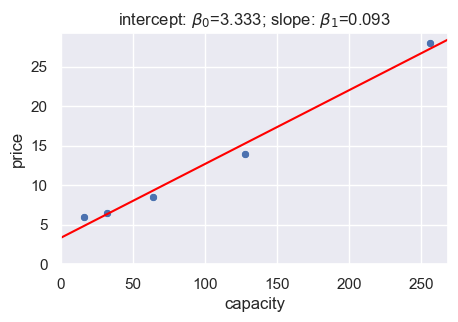

In [7]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.scatterplot(ax=ax, x=usb["capacity"], y = usb["price"])
ax.axline(xy1=(0, model.intercept_), slope=model.coef_[0], color="red")
ax.set(xlim=0, ylim = 0, title = rf"intercept: $\beta_0$={model.intercept_:.3f}; slope: $\beta_1$={model.coef_[0]:.3f}")
plt.show()

# TIPS data set

Modeling the relationship between total bill amount and tip amount using linear regression.

In [8]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


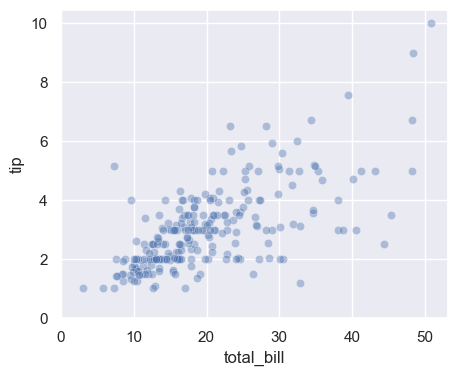

In [9]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.scatterplot(ax = ax, x=tips["total_bill"], y = tips["tip"], alpha=0.4)
ax.set(xlim=(0, None), ylim = (0, None)) # include origin
plt.show()

In [10]:
model = LinearRegression()

In [11]:
X = tips[["total_bill"]]
y = tips["tip"]

model.fit(X, y)

LinearRegression()

In [12]:
print(f"offset: {model.intercept_}")
print(f"slope: {model.coef_}")

offset: 0.9202696135546731
slope: [0.10502452]


We see that according to the model, the tip amount is about 10% of the total bill plus almost an additional dollar.

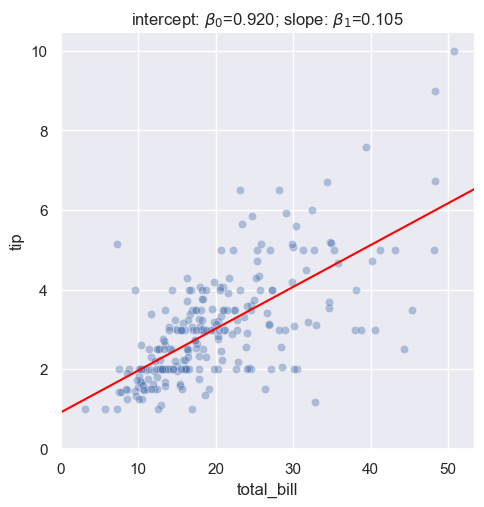

In [13]:
g = sns.relplot(x=tips["total_bill"], y = tips["tip"], alpha=0.4)
g.ax.axline(xy1=(0, model.intercept_), slope=model.coef_[0], color="red")
g.set(xlim = (0, None), ylim = (0, None), 
    title = rf"intercept: $\beta_0$={model.intercept_:.3f}; slope: $\beta_1$={model.coef_[0]:.3f}")
plt.show()

The trained model can also be used directly for prediction using `predict()` and applied to new X values without a label. 

In [14]:
X_new = np.array([5, 25, 45]).reshape(-1, 1) # X values without label
model.predict(X_new)

c:\Users\e01169\AppData\Local\miniconda3\envs\FoDS\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.4453922 , 3.54588255, 5.6463729 ])

Or you can calculate the respective model prediction for all samples (i.e. for all original data) and determine the residuals (i.e. the difference to the actual y-value).

In [15]:
y_predicted = model.predict(X)
residuals = y - y_predicted

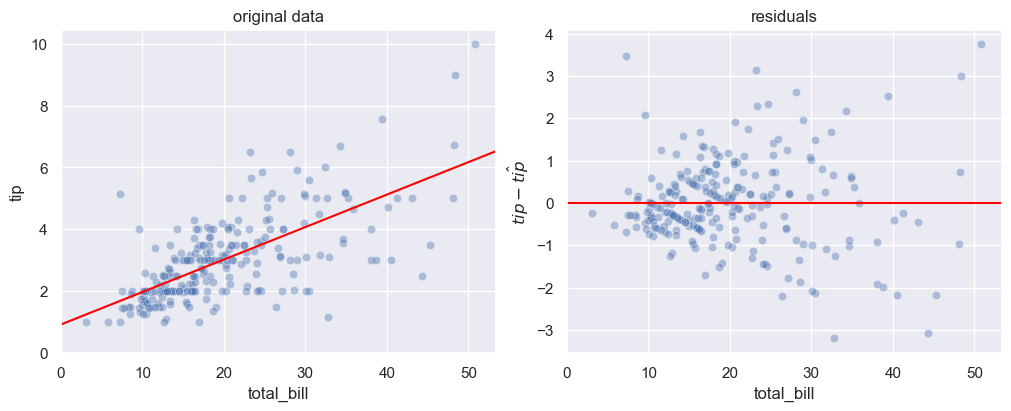

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), layout = "constrained")

sns.scatterplot(ax = axs[0], x = tips["total_bill"], y = tips["tip"], alpha=0.4)
axs[0].axline((0, model.intercept_), slope=model.coef_[0], color = "red")
axs[0].set(xlim=0, ylim=0, title = "original data")

sns.scatterplot(ax = axs[1],x = tips["total_bill"], y = residuals, alpha=0.4)
axs[1].axline((0, 0), slope=0, color = "red")
axs[1].set(xlim=0, ylabel=r"$tip - \hat{tip}$", title = "residuals") # Graphik inklusive Ursprung

plt.show()